<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/notebookes/NeuralNetWriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Amineh Dadsetan
## Outline
1. [Neural network as a generalization of linear regression](#neural-network-as-a-generalization-of-linear-regression
)
2. [How does it deal with non-linearity?](#how-does-it-deal-with-non-linearity?)
3. [Transforming input to ouput through n layers: feed forward
](#transforming-input-to-ouput-through-n-layers:-feed-forward )
4. [What does it mean to train a neural net? how we do it.](###what-does-it-mean-to-train-a-neural-net?-how-we-do-it.)
5. []()
6. []()

## Introduction

I started writing about Nueral Network which I am learning from Coursea.


There are several things you could deep dive about as much as you want. However, to keep this short, I am trying to focus on some parts of it more and that is the simple linear algebraic stuff involved in defining and improving a neural network.

In general, I am trying to introduce a nueral network internal working as a applying a series of linear transfromation in the forward direction ( on the input ) and the application of transposed of those linear transformations backwardly.


### Neural network as a generalization of linear regression
A linear regression is a linear transformation from multi dimensional input x to one dimensional output y. A classifier neural network as a generalization of linear regression, is also a function that computes an output $y \in \mathbb{R}$ from a given input multidimensional $x \in \mathbb{R}^{n^{[0]}}$

$$
\boxed{{y = nn(x), x \in \mathbb{R}^{n_0}, y \in \mathbb{R}}}
$$

We expect output of a classifier (nn) to be between 0 and 1: y should be closer to 1 when x is in the class and closer to 0 when x is not in the class.

The goal is to find or train such functions that are more flexible than just a linear transformation. There are infinitely many way to find a function `nn` that satisfies this.  There are ways, however,  to limit our options. For example we can still use some linear transformation with unknown parameters and a fixed non-linear function. For now let’s assume we only need a linear transformation.

You can also view a neural net as a function that transforms  $n^{[0]}$ dimensional vector $x$  to a 1 dimensional vector y. If this was a linear transformations, then a matrix of size $(n^{[0]}, 1)$  would do this perfectly, i.e, there exist a matrix $W \in \mathbb{R}^{n^{[0]} \times 1}$

$$
\boxed{\huge{y = W . x}}
$$


*\##keyword: linear regression, linear transformation*

### How does it deal with non-linearity?


A neural net can be as simple as $y = W.x$ When a linear relationship exist from input to output, where W is a linear transformation from  $\mathbb{R}^{n^{[0]}}$ dimensional vector to $\mathbb{R}$. If such linearity doesn’t exist, all we need to do is to apply a non-linear function $g$ on top of it

$$
\boxed{\huge{y = g(W * x)}}
$$

In theory, any function can be **represented** as such a non-linear function on top of a linear  transformation. In fact all you need to do is to use any matrix that reshapes input dimension to the output dimension, and then use a nonlinear function that makes all values match for each data point.


*\##keywords: non-linear, represent*


### Transforming input to ouput through n layers: feed forward
However, you don’t have to apply the linear transformation in one-go. You can break one it to several transformation and chain them through multiple layers. In fact you can have matrices $W^{[1]}, ..., W^{[L]}$ such that $W^{[1]}$ transform $n^{[0]}$ dim vector to  $n^{[1]}$ vector,… $W^{[i]}$  transforms a $n^{[i -1]}$ dimensional to $n^{[i ]}$ dimensional vector. Then you can write something like :


$$
\boxed {\huge{a^{[i]} = g(W^{[i]} . a^{[i - 1]} ) } }
$$


where ( $ a^{[i-1]} \in \mathbb{R}^{n^{[i-1]}} , a^{[i]} \in \mathbb{R}^{[n^{[i]}}$)

And for all you need to remember is that the dimension of $W^{[i]}$  is $\mathbb{R}^{n^{[i]} \times n^{[i-1]}}$ applies that dimensional change from input to output.

Each layer takes a vector $a^{[i]}$   of dimension $n^{[i]}$ as input, change the dimension a little bit, and then applies a simpler non linear function and out puts the vector $a^{[i + 1]}$ of dimension $n^{[i+1]}$. (technically it doesn’t need to change dimension)

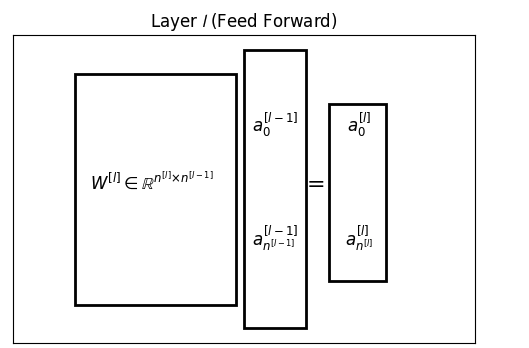

Perhaps breaking model into l layers, lets model express itself with  less complex non linear function.

This action of repeatedly applying linear transformation $W^{[l]}$  and non linear function $g^{[l]}$, from the layer 0 (input x) all through   layer l (output y) is called a **feed forward.** This name makes more sense, when we define feed backward in a little bit that is to calculate the partial derivative  of input of layer i ($a^{[l]}$) .

*\##keyword: feedforward*

###What does it mean to train a neural net? how we do it.
We talked about the feed forward, or how to calculate y based on x layer by layer. However, to  reach there  you need to  find the  matrixes $W^{[i]}$ . There is a pretty straightforward heuristic for this:

- First we initialize W’s with random numbers . Remember we know the shape of all of the W’s for each layer.
- Calculate the feedforward for initial W’s.
- Then compute how far the output is from the output we want.
- Then we find the best ***direction*** to move toward to improve computed output from desired output. Let’s call that a cost function.

Ops i forgot to  define **cost function.** I could have defined it from the beginning. But it would be a bit of distraction from all the linear and non linear transformation that we talked about. Let’s just forget about it and  think of it as a function of output y or  $a^{[L]}$. Lets call it $J(y = a^{[L]})$. The training process is to improve the cost function iteratively, by changing the W’s just a little bit in the **correct direction**.

*\##Correct direction, cost function, a little nudge, oops we forgot…*

### How to improve the initial parameters: feed backward
The trickiest part of neural nets comes here: To improve the parameters of a neural net, we need the notion of changing the parameters by just a **little bit** in the right **direction** that leads in largest change in$J(y)$ . That is exactly what a partial derivative is about.  

More formally, this directions  are

$$
dW^{[l]}\ \ \  \textbf{abbv.} \ \ \   \partial(J(y)) / \partial(W^{[l]})
$$

for all layers $1 < l < L$.

(to make the notation easier, lets abbreviate $\partial(J(y))/\partial(t)$ with just $dt$. (warning it is very confusing but Andrew Ng does this abbreviation all the time). So, we are interested in calculating $dW^{[l]}$  for all layer l’s. It is a good practice to think about the dimension of $dW^{[l]}$ . This is the amount of change we wanna make to $W^{[l]}$ so just judging by that, $dim(dW^{[l]})  = dim(W^{[l]})$.

with some calculus you can prove that $dW^{[l]}$ can be calculated from $da^{[l]}$ using the **chain rule**. (watch 3 blue one brown or read mml)

So if you have calculated all $da^{[l]}$ for all  layers, we can calculate all the nudges we need to make improvements.

### Chain rule and feed backward. The little nudges goes from right to left

First of all $da^{[l]}$ is a vector that has same dimension of $a^{[l]}$. The reason for that is $da^{[l]}$ is the amount by which we wanna change $a^{[l]}$  by. So both should be same shape.

$$
dim(da^{[l]}) = dim(a^{[l]})
$$

To improve the weights, we need to calculate $da^{[l]}$ for each layer l. These partial derivatives also can be calculated recursively based on **chain rule,** but starting from last layer.

 It means, we need to know $da^{[l + 1]}$ ( the next layer) to calculate the value of $da^{[l]}$ .

So that is why it is called a feed backward: we calculate the derivatives from the last layer to the first layer using **chain rule.**

How can we convert the $da^{[l + 1]}$ to $da^{[l ]}$ using chain rule? So there is a way to make sense of chain rule, without getting too deep in the mathematic of it. That is by noticing the shape of vectors and matrices that are supposed to perform such transformation. It is not going to be a mathematical proof but it does help you make sense of formulas. First remeber that dimension of them are $n^{[l + 1]}$ and $n^{[l]}$. So we’d like to transform a $n^{[l]}$  dimensional vector to an $n^{[l +1]}$  dimensional vector.

All you need to do here is the opposite of a feed forward that is a feed backward: apply a non linear transformation on $da^{[l + 1]}$  then apply the $W^{[l ]}$  **transposed**. You can see for yourself by appliying the transposed of $W^{[l ]}$  applies the change of dimension that we need.

$$
\boxed{ \huge{da^{[l ]} = f(W^{[l + 1].T} . da^{[l + 1]} )}}
$$

where $da^{[l-1]} \in \mathbb{R}^{n^{[l-1]}} , da^{[l]} \in \mathbb{R}^{n^{[l]}}$.

Below is a graphical way of saying it:

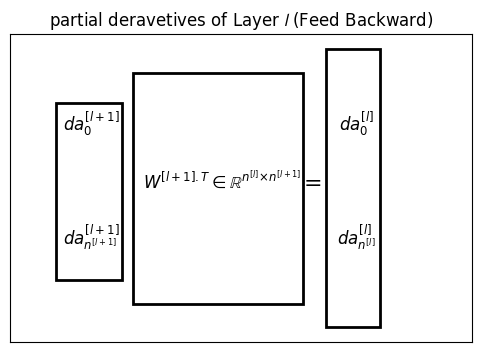

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# First column vector rectangle
first_col_vector = patches.Rectangle((-1.4, -1.2), 0.85, 2.3, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(first_col_vector)
ax.text(2.5, 0.75, '$da^{[l]}_0$', fontsize=12, ha='center')
ax.text(2.5, -0.75, '$da^{[l]}_{n^{[l]}}$', fontsize=12, ha='center')



# Matrix rectangle
matrix_rect = patches.Rectangle((-0.4, -1.5), 2.2, 3, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(matrix_rect)
ax.text(0.75, 0, '$W^{[l + 1].T} \in \mathbb{R}^{n^{[l]} × n^{[l+1]}}$', fontsize=12, ha='center')

# Equals sign
ax.text(1.90, 0, '$=$', fontsize=16, ha='center')

# Second column vector rectangle
# second_col_vector = patches.Rectangle((2.1, -1.2), 0.75, 2.3, edgecolor='black', facecolor='none', lw=2)
second_col_vector = patches.Rectangle((2.1, -1.8), 0.7, 3.6, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(second_col_vector)
ax.text(-0.95, 0.75, '$da^{[l+1]}_0$', fontsize=12, ha='center')
ax.text(-0.95, -0.75, '$da^{[l+1]}_{n^{[l+1]}}$', fontsize=12, ha='center')

# Set axis limits and remove ticks
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_title('partial deravetives of Layer $\mathcal{l}$ (Feed Backward)')
# Display the plot
plt.show()
